## seaborn

In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns

input_dir = "/Users/apple/Desktop/KB/data"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_626/feat_626__bs15_temp0.5_sf0.3_LarryData"
num_top_lg_toplot = 5

# Load dataset
data = np.load(input_dir+'/feat_626/feat_626__bs15_temp0.5_sf0.3_LarryData/scBaseEncoderFeat_Z_bs15_tau0.5.npy')
adata_subset = ad.read_h5ad(input_dir+'/LarryData/Larry_41201_2000.h5ad')
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

categories = adata_subset.obs['Cell type annotation'].to_numpy()  

print("data shape", data.shape)
print("labels shape", num_cells)


data shape (41201, 64)
labels shape 41201


In [2]:
# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)


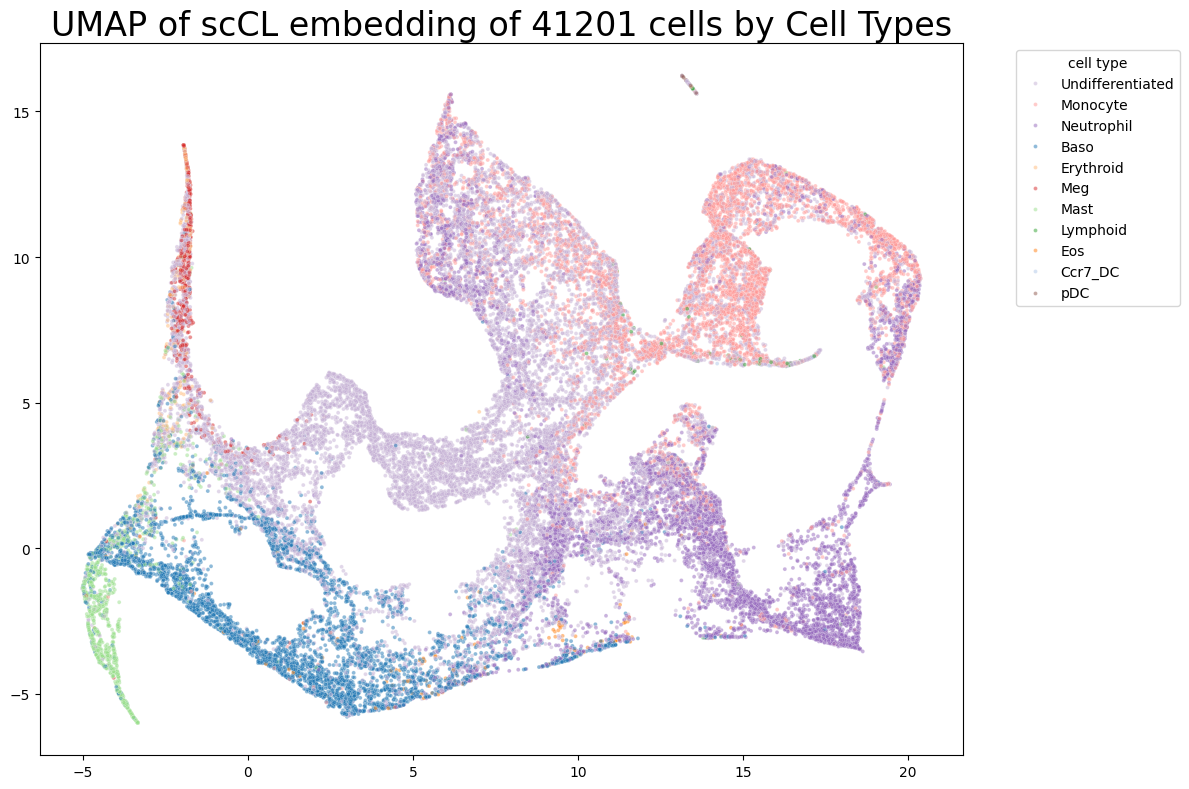

In [3]:
# Map each unique category to a specific color
unique_categories = np.unique(categories)
# Select a colormap
colormap = sns.color_palette("tab20", len(unique_categories))
category_to_color = {category: colormap[i] for i, category in enumerate(unique_categories)}

# Convert categories to colors
category_colors = np.array([category_to_color[category] for category in categories])

# Plot the UMAP embedding with dots colored according to 'categories'
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=categories, palette=category_to_color, s=8, alpha=0.5)
plt.title(f'UMAP of scCL embedding of {num_cells} cells by Cell Types', fontsize=24)
plt.legend(title="cell type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(output_dir + f'/umap_of_scCL_embedding.png', dpi=300)
plt.show()

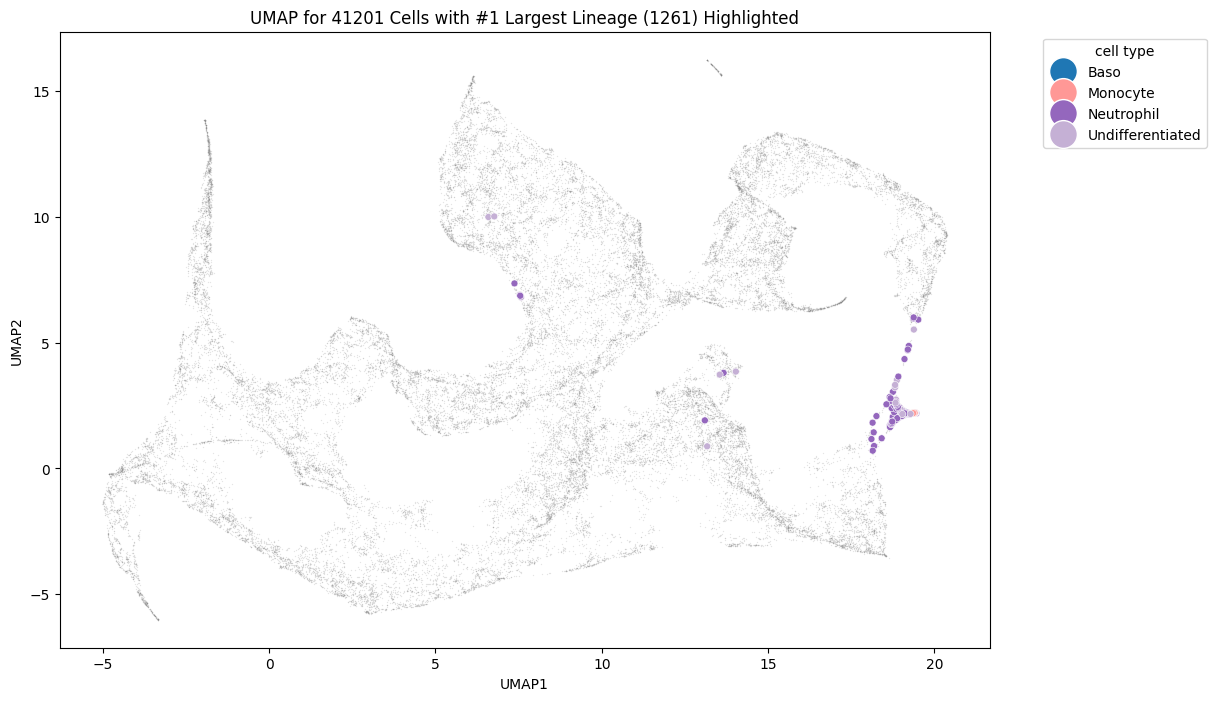

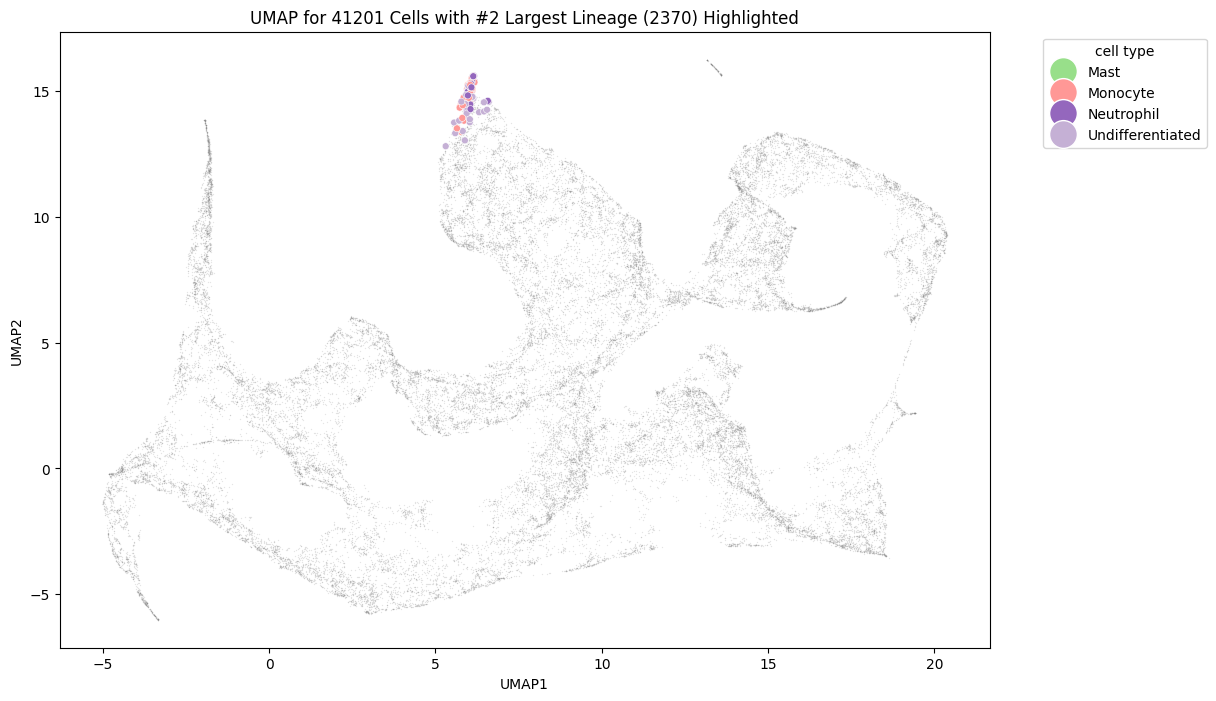

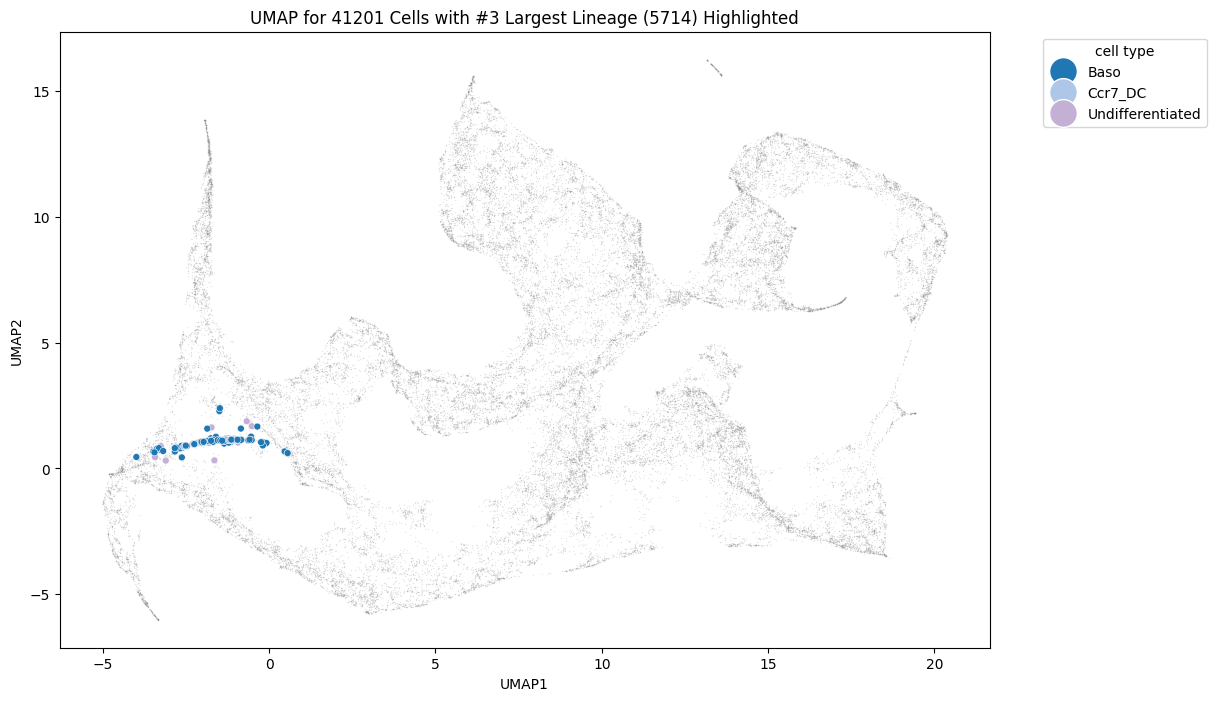

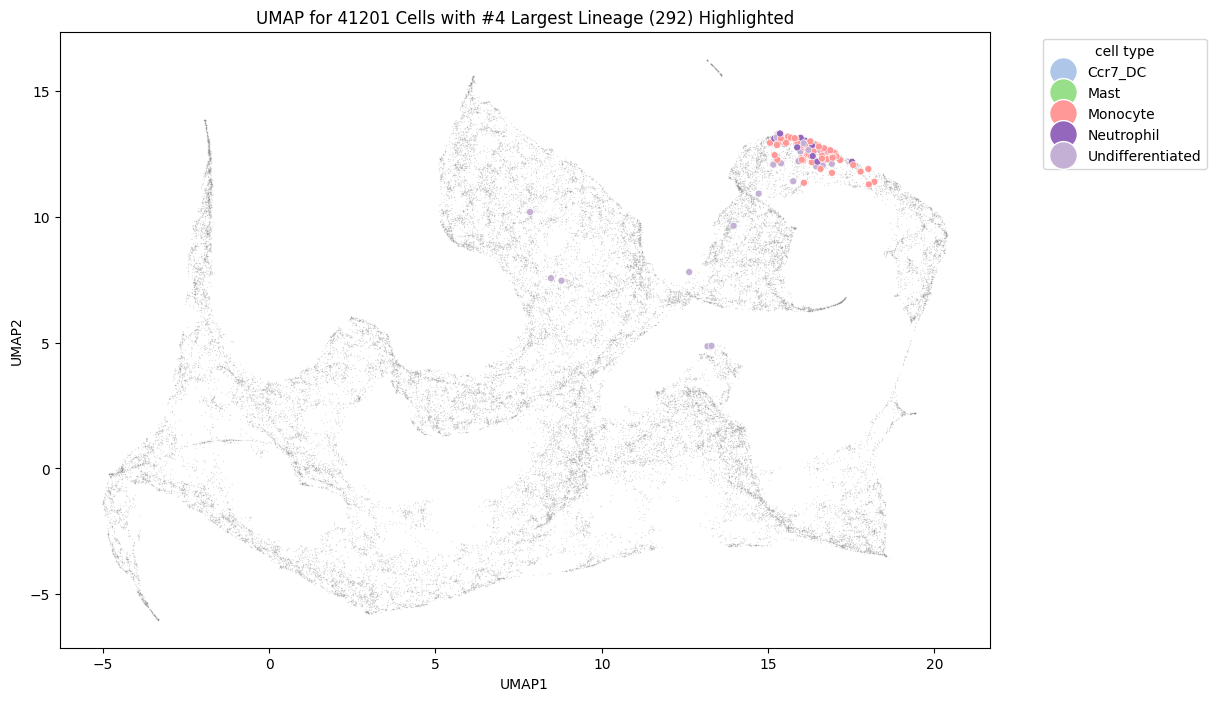

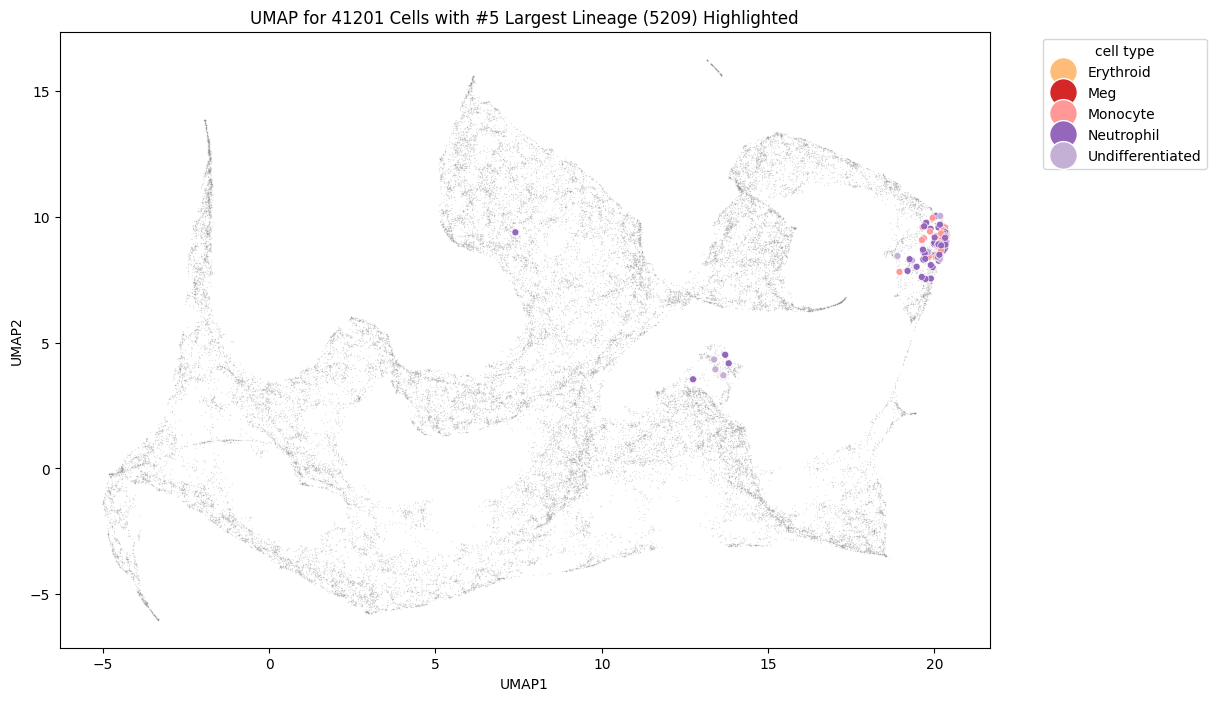

In [4]:
# Determine the top lineages
unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

default_color = 'gray'

for i, lineage in enumerate(top_lineages):
    plt.figure(figsize=(12, 8))

    # Plot all other lineages first
    for label in np.unique(labels):
        if label != lineage:
            subset = embedding[labels == label]
            sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=default_color, s=1, alpha=0.2)

    # Plot the specific lineage on top, with colors according to categories
    subset = embedding[labels == lineage]
    subset_categories = categories[labels == lineage]
    subset_colors = np.array([category_to_color[category] for category in subset_categories])
    sns.scatterplot(x=subset[:, 0], y=subset[:, 1], hue=subset_categories, palette=category_to_color, s=25, alpha=1)

    plt.title(f'UMAP for 41201 Cells with #{i+1} Largest Lineage ({lineage}) Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

    # Create a legend for the categories present in the specific lineage
    subset_unique_categories = np.unique(subset_categories)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_to_color[category], markersize=10) for category in subset_unique_categories]
    plt.legend(handles, subset_unique_categories, title="cell type", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

    plt.savefig(output_dir + f'/cell_umap_{i+1}_largest_plot.png', dpi=300)
    plt.show()
